In [1]:
import pandas as pd

df = pd.read_csv("data/Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


---
**O que aprendemos aqui:**
1. `dataframe` é uma classe da biblioteca `pandas` que representa uma tabela
2. `read_csv` constrói um objeto da classe dataframe a partir de um arquivo .csv
3. `head()` é um método que mostra as primeiras linhas da tabela. Por padrão, mostra as cinco primeiras, mas é possível passar o número de linhas desejado:

**Observação:** `CPI` significa *Consumer Prince Index*, e é um índice relacionado à inflação e ao poder de compra.

---

In [4]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


---
**O que aprendemos aqui:**
- `info()` mostra um resumo estrutural do dataframe, com o número de linhas, número de colunas, tipo de cada uma, etc.
- Índice não conta como coluna

É importante pois .csv não tem tipo, o pandas *infere*, e portanto deve ser conferido

---

In [13]:
df['Date'] 

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [31]:
type(df['Date'])

pandas.core.series.Series

In [36]:
df['Date'].index

RangeIndex(start=0, stop=6435, step=1)

In [35]:
type(df['Date'].index)

pandas.core.indexes.range.RangeIndex

In [38]:
df['Date'].values

array(['2010-02-05T00:00:00.000000000', '2010-02-12T00:00:00.000000000',
       '2010-02-19T00:00:00.000000000', ...,
       '2012-10-12T00:00:00.000000000', '2012-10-19T00:00:00.000000000',
       '2012-10-26T00:00:00.000000000'],
      shape=(6435,), dtype='datetime64[ns]')

In [39]:
type(df['Date'].values)

numpy.ndarray

---
**O que aprendemos aqui:**

- `Series` é uma classe do pd que representa uma lista *rotulada*
- cada Series possui duas partes:
  1. os índices, que são acessíveis via `.index`, da classe `RangeIndex` (própria do pandas)
  2. os valores, acessíveis via `.values`, da classe `ndarray` (do NumPy)
- `df['coluna']` retorna a Series da coluna especificada

---

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


---
**O que aprendemos aqui:**

- `to_datetime` converte uma Series numa Series, com o tipo correto de data
- é muito importante que as datas estejam com o tipo correto para poder usar os métodos e fazer análises corretas

---

In [18]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


---
**O que aprendemos aqui:**

- `describe()` calcula estatísticas coluna a coluna

In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


---
**O que aprendemos aqui:**

- Para tomar o transposto de um dataframe, basta fazer `.T`

---

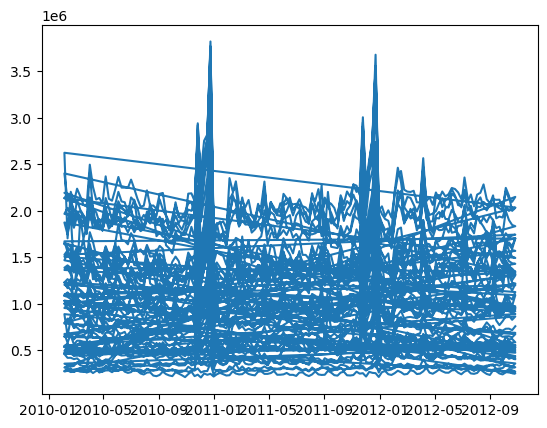

In [22]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Weekly_Sales'])

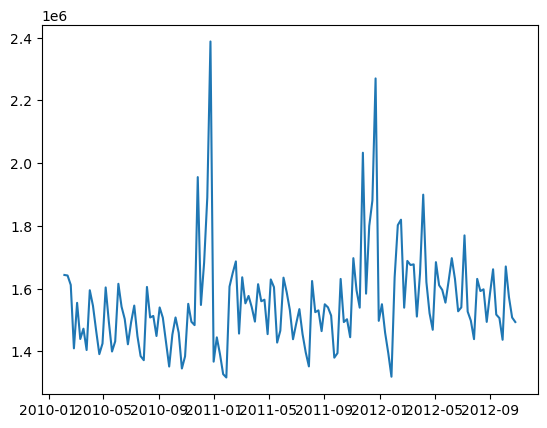

In [23]:
df1 = df[df['Store'] == 1]

plt.plot(df1['Date'], df1['Weekly_Sales'])
plt.show()

---
**O que aprendemos aqui:**

- podemos usar uma condição dentro dos colchete `[]` para retornar um outro dataframe
- na verdade, se torna uma Series de valores booleanos
---

In [29]:
total_sales = df.groupby('Date')['Weekly_Sales'].sum()
total_sales

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

---
**O que aprendemos aqui:**

- A utilizar `group by` e `sum` com pandas.
- O resultado é uma Series indexada pela coluna que foi agrupada
---

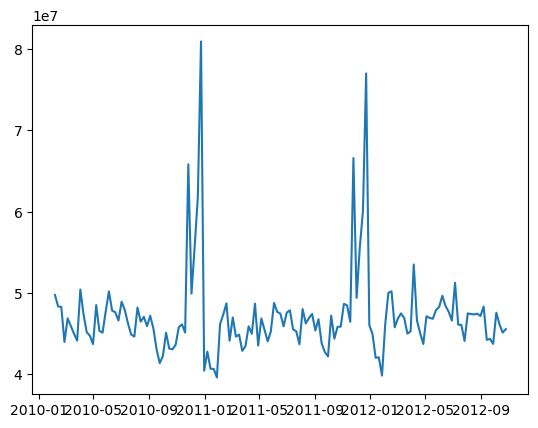

In [40]:
plt.plot(total_sales)

<Axes: xlabel='Date'>

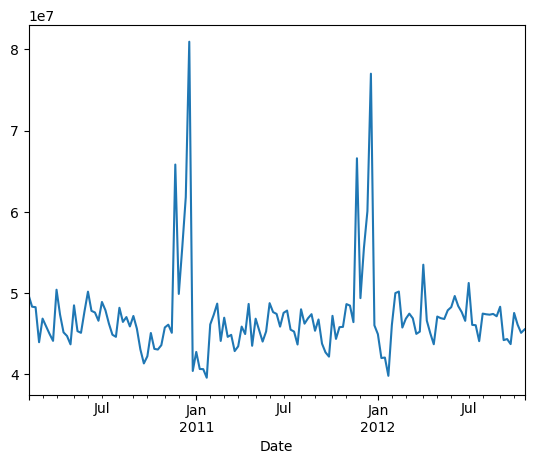

In [42]:
total_sales.plot()

---
**O que aprendemos aqui:**

- quando fazemos `plt.plot(series)`, ele toma o index como eixo x e o values como eixo y
- mesmo assim, é bem melhor usar o método `plot()`, próprio das Series: note que a formatação dos eixos está bem melhor
---

In [43]:
df1.set_index('Date')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.666,222.981658,6.908
2012-10-05,1,1670785.97,0,68.55,3.617,223.181477,6.573
2012-10-12,1,1573072.81,0,62.99,3.601,223.381296,6.573


--- 
**O que aprendemos aqui:**

- `set_index('coluna')` remove a coluna especificada do conjunto de colunas e a transforma num índice.
- retorna um dataframe
- o índice não precisa ser único, mas isso pode dar problemas
- juntando diversas coisas que aprendemos, podemos fazer:
---

<Axes: xlabel='Date'>

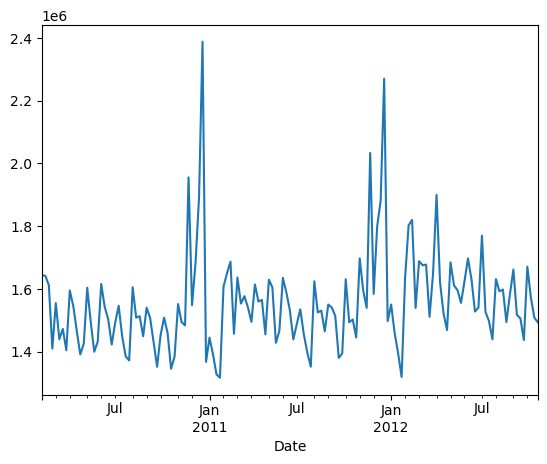

In [45]:
df1.set_index('Date')['Weekly_Sales'].plot()

In [47]:
df1 = df1.set_index('Date')
df1[['Weekly_Sales', 'Unemployment']]

,Weekly_Sales,Unemployment
Date,,
2010-02-05,1643690.90,8.106
2010-02-12,1641957.44,8.106
2010-02-19,1611968.17,8.106
2010-02-26,1409727.59,8.106
2010-03-05,1554806.68,8.106
...,...,...
2012-09-28,1437059.26,6.908
2012-10-05,1670785.97,6.573
2012-10-12,1573072.81,6.573


<Axes: xlabel='Date'>

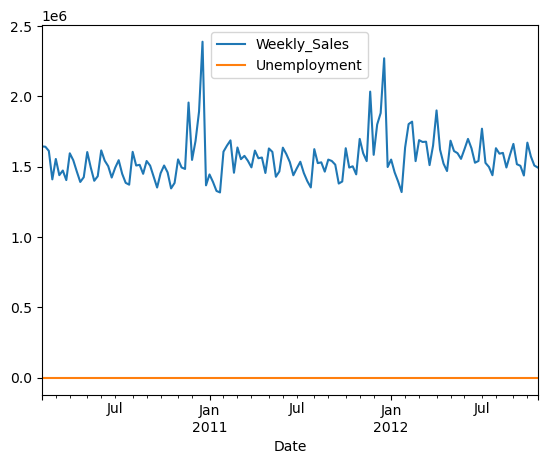

In [48]:
df1[['Weekly_Sales', 'Unemployment']].plot()

<Axes: xlabel='Date'>

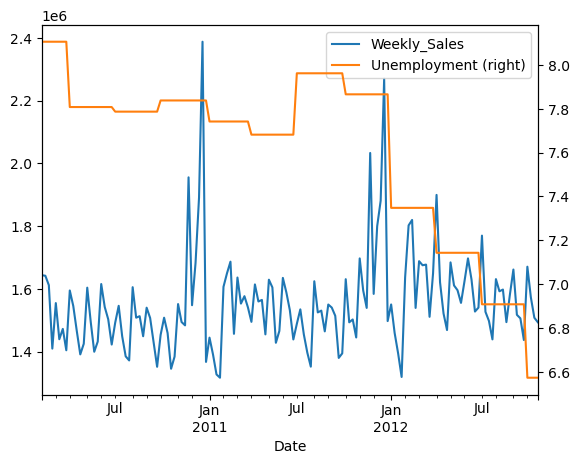

In [52]:
df1[['Weekly_Sales', 'Unemployment']].plot(secondary_y = 'Unemployment')

---
**O que aprendemos aqui:**

- devemos usar colchetes duplos `[[]]` para selecionar mais de uma coluna, criando um novo dataframe
- o `plot()` plota uma linha para cada coluna do dataframe
- é possível colocar uma segunda escala do lado direito
---

In [53]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

---
**O que aprendemos aqui?**

- `unique()` é um método de Series que devolve uma ndarray com os valores
- respeita a ordem de aparição
---

**O que faremos a seguir?**

Iremos criar um dicionário contendo o dataframe de cada loja, já setando as datas como índices e ordenando de modo crescente.
Lembre-se que a definção de um dicionário usa chaves `{}` e dois-pontos `:`

---

In [56]:
dfs = {
    store: (
        df[df['Store'] == store]
        .set_index('Date')
        .sort_index()
    )
    for store in df['Store'].unique()
}


## pd.concat

- pega um iterável de dataframes ou series (array, dicts, etc)
- possui a opção axis = 0 ou axis = 1
- no primeiro caso, une as colunas e empilha as linhas (mais linhas)
- no segundo caso, une os índices e cola colunas (mais colunas)
- no caso se não possuir valor, retorna NaN

** O que faremos a seguir?**

Utilizaremos essa função para colar os dataframes das diversas lojas. Para isso, é interessante saber se as datas são iguais. Vamos fazer um teste.

In [59]:
dfs[1].index.equals(dfs[2].index)


True

In [61]:
df_wide = pd.concat(
    {store: dfs[store]['Weekly_Sales'] for store in dfs},
    axis=1
)
df_wide.head()

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75,...,467546.74,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51
2010-02-12,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52,...,469563.70,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64
2010-02-19,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-02-26,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
2010-03-05,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,...,480203.43,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22


<Axes: xlabel='Date'>

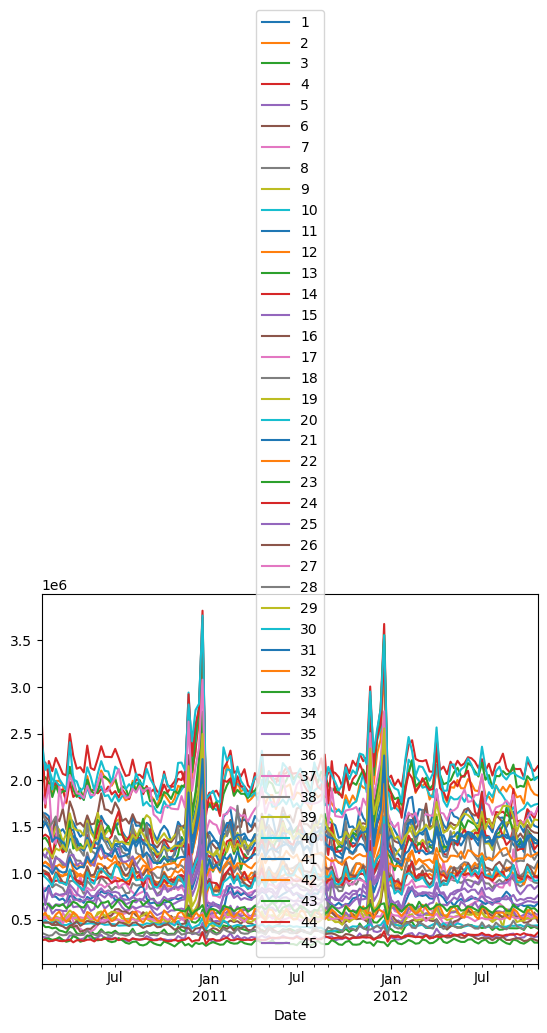

In [62]:
df_wide.plot()

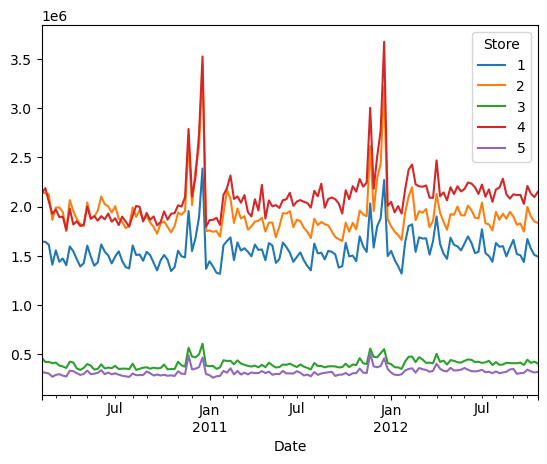

In [63]:
stores = [1, 2, 3, 4, 5]

df[df['Store'].isin(stores)] \
  .pivot(index='Date', columns='Store', values='Weekly_Sales') \
  .plot()
plt.show()


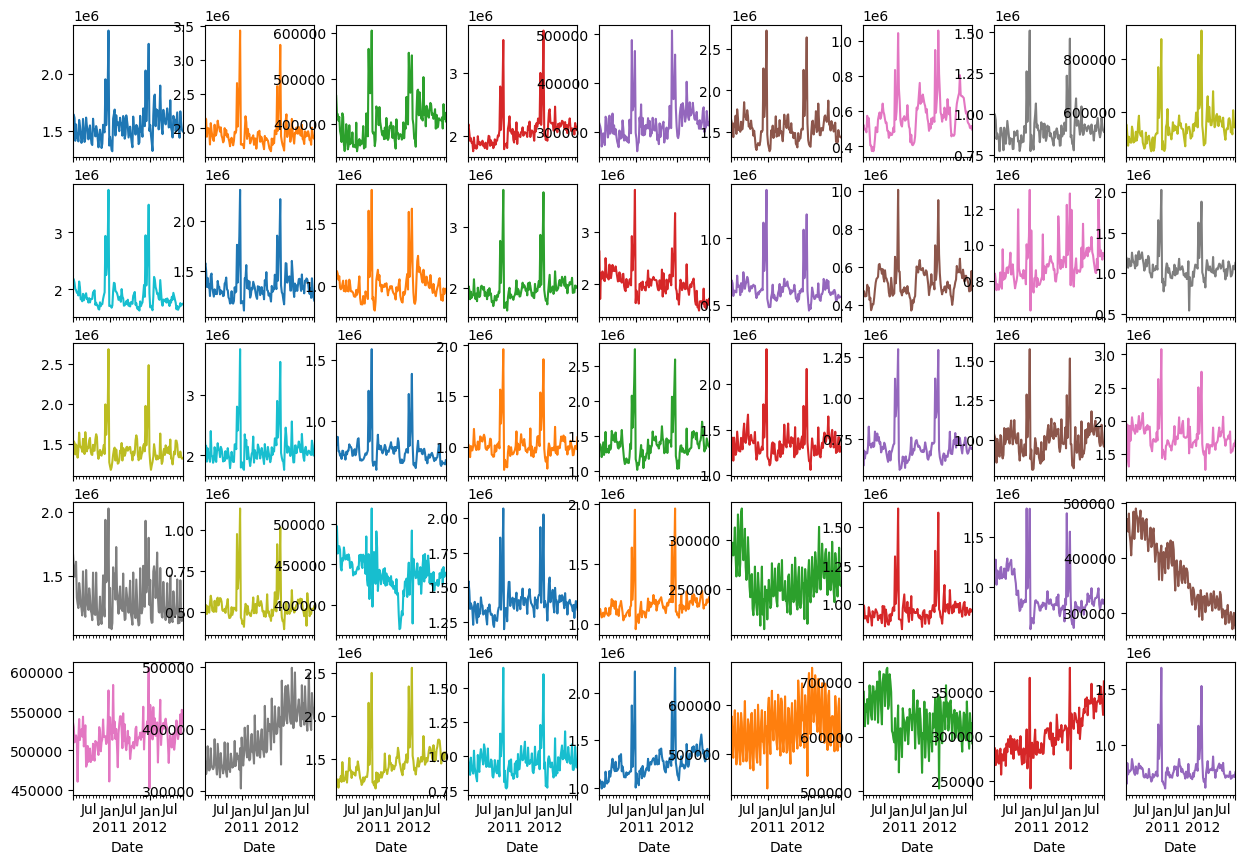

In [64]:
df_wide = df.pivot(index='Date', columns='Store', values='Weekly_Sales')

df_wide.plot(subplots=True, layout=(5, 9), figsize=(15, 10), legend=False)
plt.show()


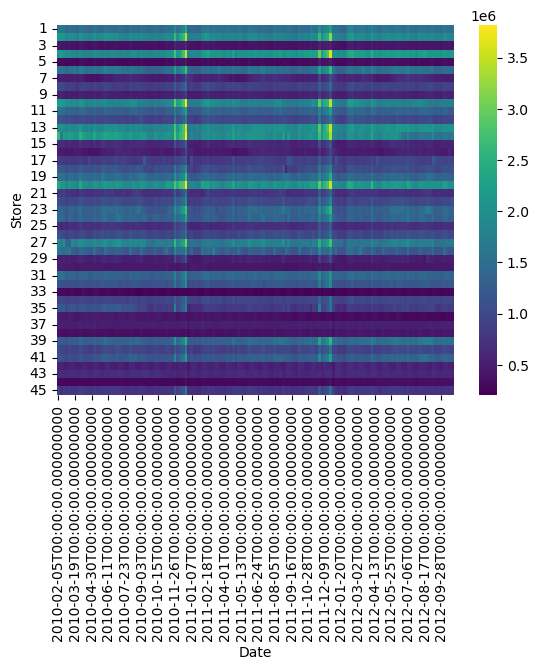

In [65]:
import seaborn as sns

sns.heatmap(df_wide.T, cmap='viridis')
plt.show()
